In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

The following ML algorithms will be used to better analyze the performances of each of them on an imbalanced dataset
1) Logistic Regression
2) Gaussian Naive Bayes 
3) Random Forrest
4) XGBoost 
5) Penalized-SVM 

This ipynb file will be used to train and save the models to be used later in the prediction ipynb

In [2]:
train_data = pd.read_csv('../Data/data-created/train_data_preprocessed.csv')

In [3]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,income_slab
0,-0.357282,0.109064,-1.175573,-0.120165,-0.885275,-1.046681,1.237338,-1.381823,-0.981828,-0.463611,-0.193477,0,-0.007246
1,-1.468799,-2.200374,0.920052,0.179146,0.848642,-0.187122,-2.411624,0.490766,-0.876088,-0.463611,-0.193477,1,-1.225624
2,-0.357282,0.032477,-1.175573,1.675700,0.270669,-0.187122,1.237338,0.587793,1.450183,-0.463611,-1.395338,0,-0.007246
3,0.365197,-2.343024,0.221510,-0.120165,0.270669,0.672438,-0.555679,0.962819,1.450183,-0.463611,1.008383,1,-1.225624
4,-0.357282,-0.088000,-1.175573,-0.718787,1.426614,-1.046681,0.512819,-0.991957,0.392787,-0.463611,-1.395338,0,-0.007246


In [4]:
X_train = train_data.drop(['loan_status'],axis=1)
y_train = train_data.loan_status

In [5]:
X_train.shape, y_train.shape

((26064, 12), (26064,))

In [6]:
def metrics(matrix):
    TN = matrix[0,0]
    TP = matrix[1,1]
    FP = matrix[0,1]
    FN = matrix[1,0]
    recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    f1_score = 2*recall*precision/(recall+precision)
    return [recall,precision,f1_score]

##### 1) Logisic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
Logistic_model = LogisticRegression()

In [9]:
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [10]:
X_train_pred = Logistic_model.predict(X_train)

In [11]:
logistic_confusionMatrx = confusion_matrix(y_train,X_train_pred,labels=Logistic_model.classes_)
print(logistic_confusionMatrx)

[[19341  1037]
 [ 3126  2560]]


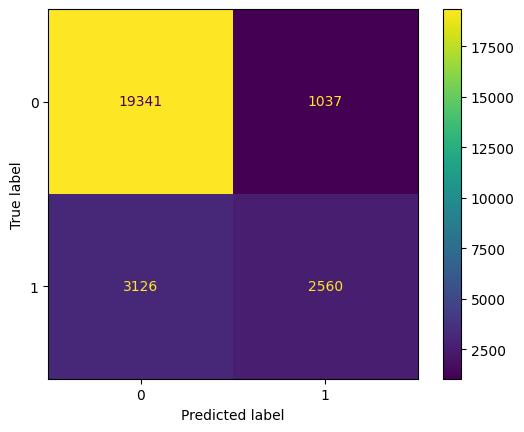

In [12]:
disp = ConfusionMatrixDisplay(logistic_confusionMatrx)
disp.plot()
plt.show()

In [13]:
logistic_metrics = metrics(logistic_confusionMatrx)

In [14]:
logistic_metrics

[0.4502286317270489, 0.7117041979427301, 0.5515458364752773]

In [15]:
with open('../models/logistic_regression.pkl','wb') as f:
    pickle.dump(Logistic_model,f)

##### 2) Gaussian Naive Bayes 

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X_train,y_train)

GaussianNB()

In [19]:
X_train_pred = gnb.predict(X_train)

In [20]:
gnb_confusionMatrix = confusion_matrix(y_train,X_train_pred,labels=gnb.classes_)

In [21]:
print(gnb_confusionMatrix)

[[17387  2991]
 [ 2014  3672]]


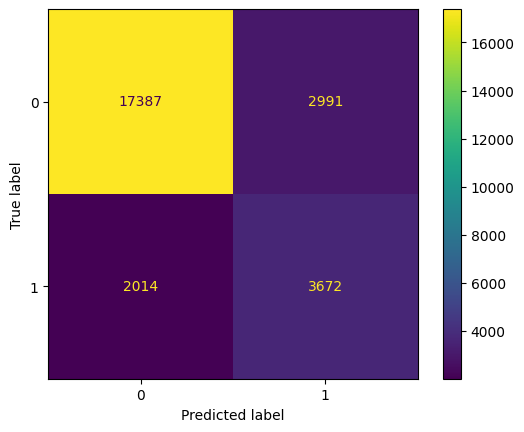

In [22]:
disp = ConfusionMatrixDisplay(gnb_confusionMatrix)
disp.plot()
plt.show()

In [23]:
gnb_metrics = metrics(gnb_confusionMatrix)
print(gnb_metrics)

[0.6457966936334858, 0.5511031067086898, 0.5947040246173779]


In [24]:
with open('../models/gnb.pkl','wb') as f:
    pickle.dump(gnb,f)

##### 3) Random Forrest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
randomForrest = RandomForestClassifier(max_depth=5,random_state=42)

In [27]:
randomForrest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [28]:
X_train_pred = randomForrest.predict(X_train)

In [29]:
randomForrest_confusionMatrix = confusion_matrix(y_train,X_train_pred,labels=randomForrest.classes_)

In [30]:
print(randomForrest_confusionMatrix)

[[20121   257]
 [ 2232  3454]]


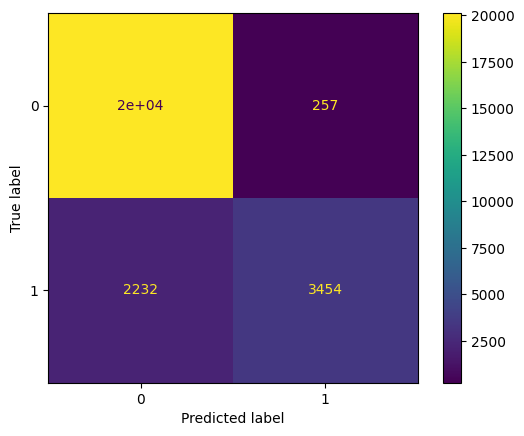

In [31]:
disp = ConfusionMatrixDisplay(randomForrest_confusionMatrix)
disp.plot()
plt.show()

In [32]:
randomForrest_metrics = metrics(randomForrest_confusionMatrix)
print(gnb_metrics)

[0.6457966936334858, 0.5511031067086898, 0.5947040246173779]


In [33]:
with open('../models/random_forrest.pkl','wb') as f:
    pickle.dump(randomForrest,f)

##### 4) XGBoost

In [34]:
from xgboost import XGBClassifier

In [49]:
xgb = XGBClassifier(random_state=42,subsample=0.5)

In [50]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
X_train_pred = xgb.predict(X_train)

In [52]:
xgb_confusion_matrix = confusion_matrix(y_train,X_train_pred,labels=xgb.classes_)

In [53]:
xgb_confusion_matrix

array([[20308,    70],
       [ 1063,  4623]])

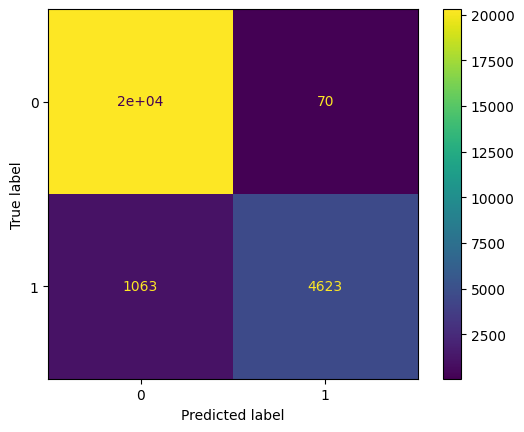

In [54]:
disp = ConfusionMatrixDisplay(xgb_confusion_matrix)
disp.plot()
plt.show()

In [55]:
xgb_metrics = metrics(xgb_confusion_matrix)
print(xgb_metrics)

[0.8130495954977137, 0.9850841679096527, 0.8908372675594951]


In [48]:
with open('../models/xgboost.pkl','wb') as f:
    pickle.dump(xgb,f)